# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (8000, 28, 28)
Y_train shape: (8000,)
X_test shape: (2000, 28, 28)
Y_test shape: (2000,)


In [44]:
#print the unique values in Y_train

unique_values = np.unique(Y_train)
print("Unique values in Y_train =", unique_values)

Unique values in Y_train = [0 1 2 3 4 5 6 7 8 9]


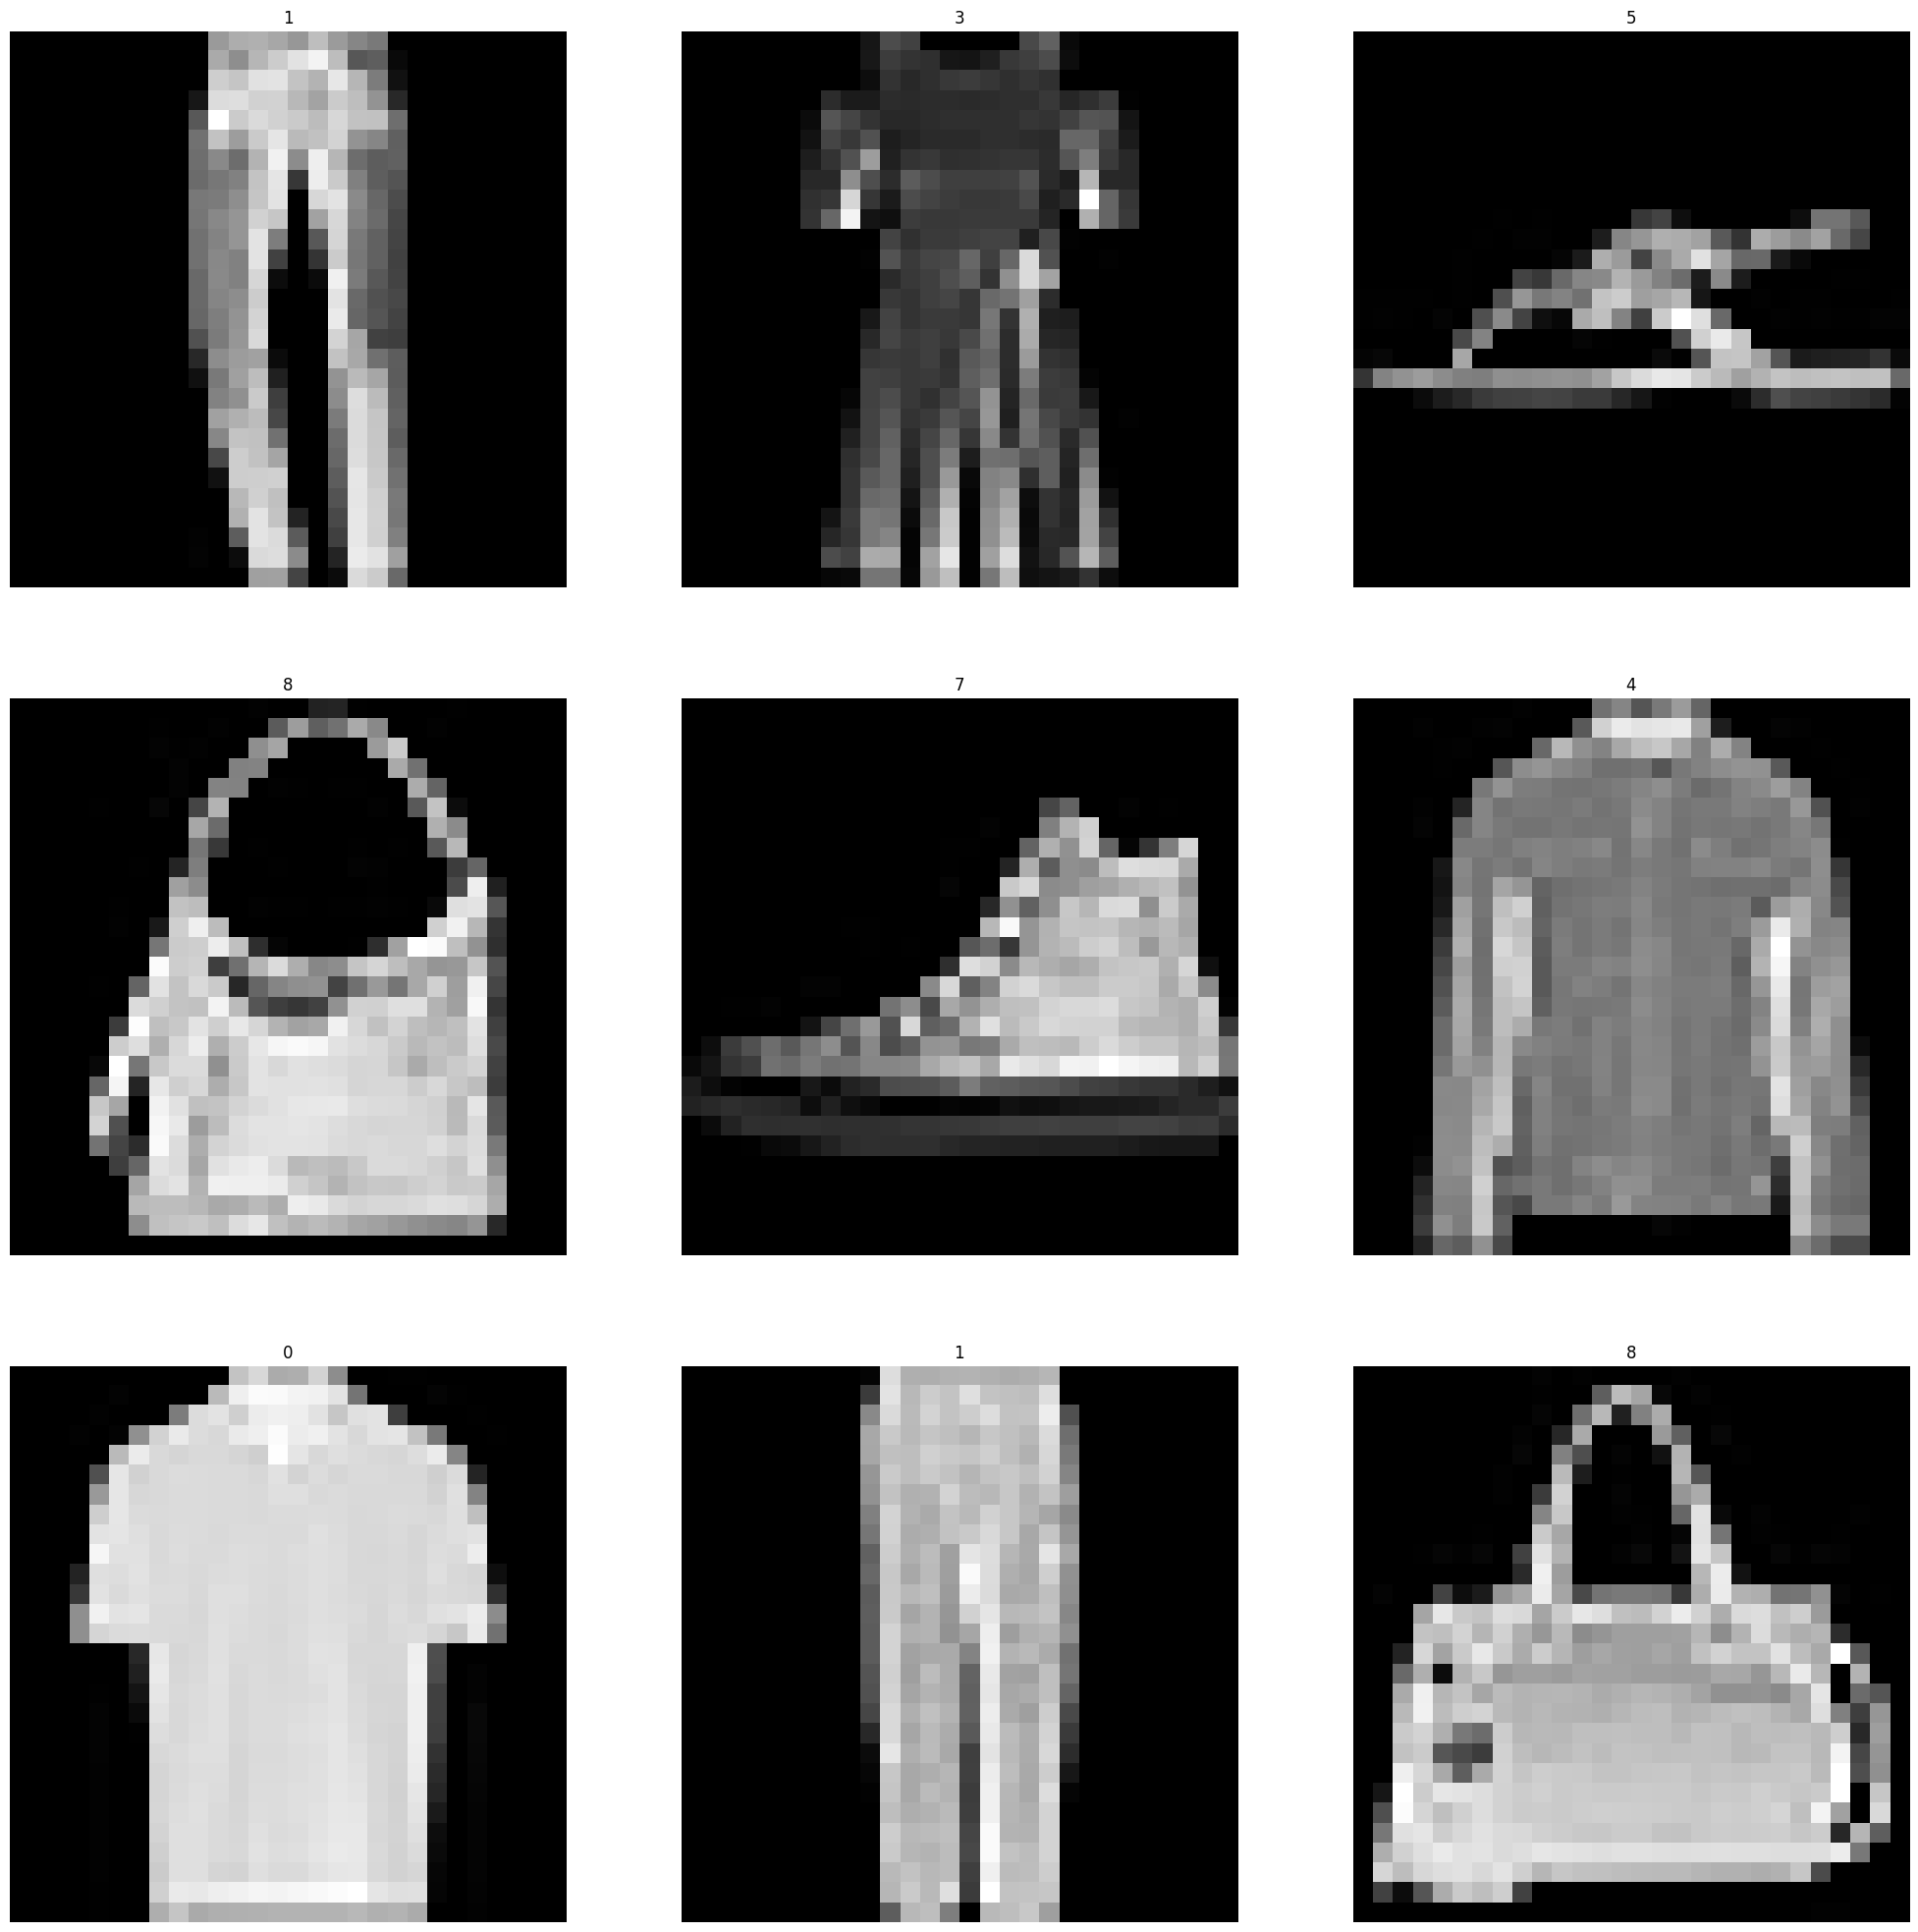

In [45]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  #edit2__add_label_here_
  plt.imshow(X_train[index], cmap="gray")
  plt.title(Y_train[index])
  plt.axis('off')

  


###These number denotes the respective object
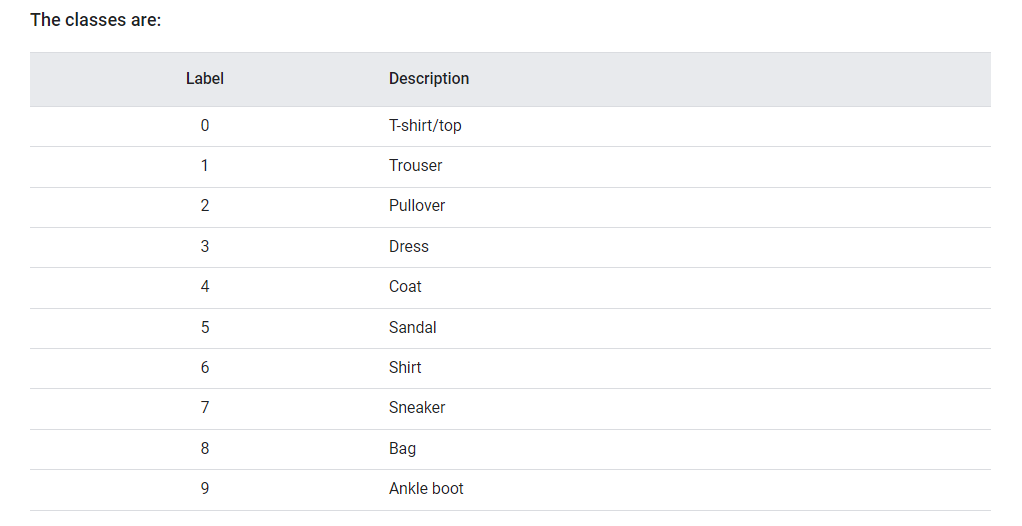

In [46]:
# Find the count of each type of class
class_counts = np.bincount(Y_train)
print("Class counts:", class_counts)

Class counts: [780 785 782 773 815 803 833 809 799 821]


In [47]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation='relu'))


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [48]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [49]:
#Lets analyse the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [50]:
""" 
[objective] Write the answer here: The number of trainable parameters is 109,386
"""

' \n[objective] Write the answer here: The number of trainable parameters is 109,386\n'

In [51]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10)


Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 4620675.0000 - accuracy: 0.0931 - val_loss: 45.1656 - val_accuracy: 0.0962
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0958 - val_loss: 45.1659 - val_accuracy: 0.0962
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 2.3022 - accuracy: 0.1022 - val_loss: 45.1661 - val_accuracy: 0.0950
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 2.3021 - accuracy: 0.1016 - val_loss: 45.1664 - val_accuracy: 0.0950
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 2.3020 - accuracy: 0.1030 - val_loss: 45.1666 - val_accuracy: 0.0950
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 2.3019 - accuracy: 0.1027 - val_loss: 45.1667 - val_accuracy: 0.0962
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 2.3019 - accuracy: 0.1037 - val_loss: 45.1669 - val_accuracy: 

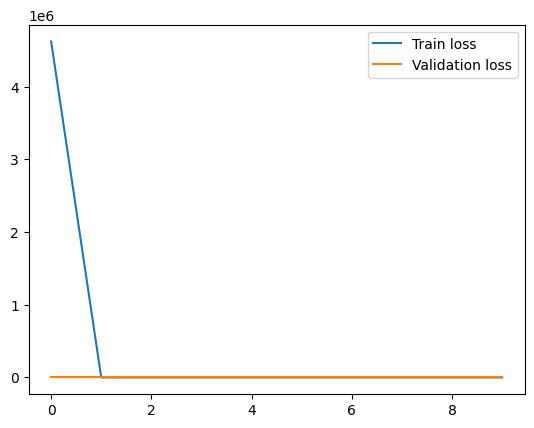

In [52]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [53]:
"""
[Under 100 words] Write your answer here: The graph shows the training loss and validation loss over epochs. If the training loss decreases while the validation loss increases, it may indicate overfitting.
"""                                                                                                                                                                                  


'\n[Under 100 words] Write your answer here: The graph shows the training loss and validation loss over epochs. If the training loss decreases while the validation loss increases, it may indicate overfitting.\n'

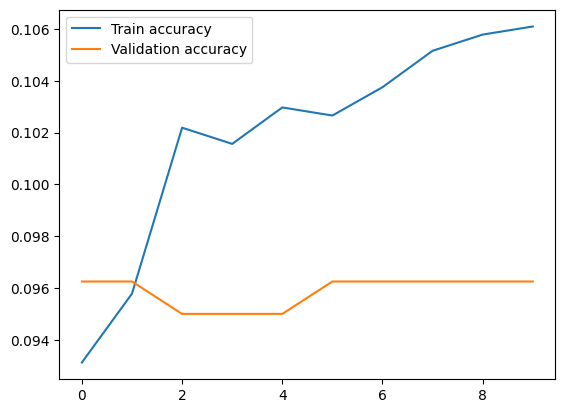

In [54]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [18]:
"""
[Under 100 words] Write your answer here:The graph shows the training accuracy and validation accuracy over epochs. If the training accuracy keeps increasing while the validation accuracy plateaus or decreases, it may indicate overfitting.


"""                                                                                                                                                                                  

'\n[Under 100 words] Write your answer here:\n\n'

In [19]:
#Checking the prediction

Y_predicted = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [58]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
r2_score_value = r2_score(Y_test, np.argmax(Y_predicted, axis=1))
print("R2_Score:", r2_score_value)

R2_Score: -0.8475485486305121


In [59]:
# Let's see the kernel(weights) of the layers
print("Kernel shape of the 2nd layer =", model.layers[1].kernel.shape)

Kernel shape of the 2nd layer = (784, 128)


In [60]:
# print the shape of kernel of other layers as well                                                                                                                        
print("Kernel shape of the 3rd layer =", model.layers[2].kernel.shape)
print("Kernel shape of the output layer =", model.layers[3].kernel.shape)

Kernel shape of the 3rd layer = (128, 64)
Kernel shape of the output layer = (64, 10)


In [23]:
# Does that satisfied the matrix multiplication math discussed earlier   

In [62]:
#Yes,it satisfies the matrix multiplication math                                                                                                                                                                   
                                                                                                                                                                                                                                                                                                                      